<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This tutorial is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>, except for figures of external sources as indicated.

# WiDS Datathon 2022 – CCAI Tutorial: Building Load Forecasting


Authors:
*   Marcus Voss – *Birds on Mars, TU Berlin, Climate Change AI*
*   Nikola Milojevic-Dupont – *MCC & TU Berlin, Climate Change AI, WiDS Datathon 2022 Organizing Committee Member* 

## Overview

In this tutorial, we will investigate the task of building load forecasting and will try to gain domain knowledge about building energy prediction of relevance to the [WiDS Datathon 2022](https://www.widsconference.org/datathon.html). 

The task of building load forecasting involves predicting hourly energy use 24h ahead by learning the relationship between historical load data and predictive features. It is similar to the task of the [WiDS Datathon 2022](https://www.widsconference.org/datathon.html) in the sense that in both tasks we are aiming to predict future energy use based on predictive features. In both cases, climate and weather variables are used as an important predictor as they strongly influence the needs for heating and cooling. 

However, the task of the tutorial differs from that of the datathon in several aspects. First, in this tutorial, we look at hourly data, while in the datathon, the target is aggregated per year. Second, we will focus on predicting a time series multiple steps ahead, while in the datathon the goal is only to predict one year ahead. Third, this tutorial will emphasize learning the relationships between loads and outdoor temperature, while in the datathon more variables are available, for example, building attributes. Fourth, here we look at the aggregated load of 10 buildings while in the datathon, energy use will be given at the building level. However, we will still be able to discuss various commonalities between both tasks.

Through this tutorial, we will aim to cover several learning objectives of relevance to the [WiDS Datathon 2022](https://www.widsconference.org/datathon.html):

- understanding the climate, domain and data science background of the datathon task,

- going through some concrete issues faced when using data science to model building energy use,

- highlighting some basic elements of the methodological toolbox used by researchers and practitioners in this space.

We hope this tutorial can help contestants get started experimenting and come up with their own ideas for the [WiDS Datathon 2022](https://www.widsconference.org/datathon.html)!
 
## Background

### Climate background 🌍 
- Why are buildings primordial in the context of climate change? 
> Buildings offer some of the lowest-hanging fruit when it comes to reducing GHG emissions. While the energy consumed in buildings is responsible for a quarter of global energy-related emissions, a combination of easy-to-implement fixes and state-of-the-art strategies could reduce emissions for existing buildings by up to 90%. It is possible today for buildings to consume almost no energy. Many of these energy efficiency measures actually result in overall cost savings and simultaneously yield other benefits, such as cleaner air for occupants. This potential can be achieved while maintaining the services that buildings provide – and even while extending them to more people, as climate change will necessitate. For example, more people will need access to air conditioning in regions where deadly heatwaves will become common with the changing climate. *Tackling Climate Change with Machine Learning, Rolnick et al. 2019*

- Why do we need to predict building energy demand?
> For many impactful mitigation strategies – such as district heating and cooling, neighborhood planning, and large-scale retrofitting of existing buildings – coordination at the district and city level is essential. Policymakers use instruments such as building codes, retrofitting subsidies, investments in public utilities, and public-private partnerships to reduce GHG emissions without compromising equity. [...] However, many regions of the world have almost no energy consumption data, making it difficult to design targeted mitigation strategies. *Tackling Climate Change with Machine Learning, Rolnick et al. 2019*



### Domain Background 💡
- What are different types of building energy demand prediction tasks?
- How does the task of the tutorial and that of the datathon relate to each other?
- How do people usually tackle building energy demand prediction?

#### Forecasting Taxonomy
Forecasts of demand and supply are generally an important task in the energy transition and hence climate change mitigation (see also *Tackling Climate Change with Machine Learning, Rolnick et al. 2019*). With a trend to decentralization, forecasts are needed in all *spatial dimensions* from the country-level and the level of high voltage transmission systems down to individual buildings, households, and even devices (typically large devices like electric vehicles or heat pumps). 

Besides the spatial dimension, forecasts are also needed in different *time horizons*, depending on the task. *Short-term* and *very-short term forecasts* of minutes to a few days ahead are needed, for instance, for real-time scheduling tasks to reduce the reliance on polluting standby plants and to manage increasing amounts of variable sources proactively. *Long-term forecasts* of weeks and years ahead can help system operators (and investors) to determine where and when to build, for instance, variable renewable plants. While the taxonomy of short- and long-term forecasts is not very clearly defined, the following figure gives an overview of how the terms are typically used and indicates where this tutorial and the datathon lay:

|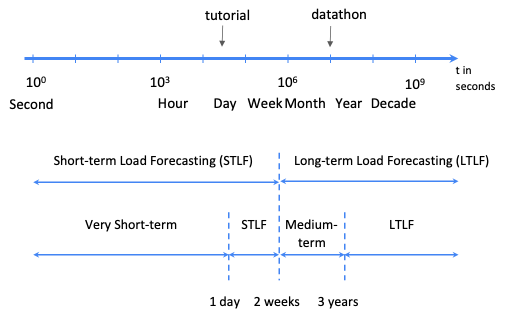| 
|:--:| 
| *Source: Based on figure from *Probabilistic electric load forecasting: A tutorial review. International Journal of Forecasting, Hong, T., & Fan, S., 2016)**|



#### Forecasting Methods

The time series forecasting task, in general, has for a long time been approached by *parametric* and *statistical methods* that have been specially designed to handle time series. Examples are autoregressive models (AR) and their extensions ARMA, ARIMA, and ARIMAX or models based on exponential smoothing (see Chapters 7-10 of this [free online book](https://otexts.com/fpp3/) on some classical forecasting models). As in many domains in recent years, machine learning models have increasingly been applied to forecasting problems. In contrast to many other domains like image recognition or natural language processing, in time-series forecasting they have not been yet completely dominating over other approaches in the field, like simple benchmarks and statistical approaches. This is the case because many time-series problems have limited data availability, and algorithms were often unnecessarily complex and limit human interpretability. 

Only in recent years have machine learning models, for instance using neural networks or gradient boosting, started to consistently outperform other methods (see for instance the discussion of the [Kaggle M5 time series forecasting competition](https://www.kaggle.com/c/m5-forecasting-accuracy) in *The M5 accuracy competition: Results, findings and conclusions. International Journal of Forecasting, Makridakis, S and Spiliotis, E and Assimakopoulos, V. 2020*). Initially, fully connected neural networks were applied, but also recurrent neural networks and variants like Long-Short Term Memory (LSTM, see [this](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) good introduction) were applied with some success. But also convolutional neural networks (CNN) like [WaveNet](https://deepmind.com/blog/article/wavenet-generative-model-raw-audio) were applied with techniques like causal convolutions to treat the auto-regressive nature of time series (see figure below).

| <img src="https://lh3.googleusercontent.com/Zy5xK_i2F8sNH5tFtRa0SjbLp_CU7QwzS2iB5nf2ijIf_OYm-Q5D0SgoW9SmfbDF97tNEF7CmxaL-o6oLC8sGIrJ5HxWNk79dL1r7Rc=w2048-rw-v1" alt="WaveNet" style="float: left; margin-right: 10px;" /> | 
|:--:| 
| Source: [DeepMind](https://deepmind.com/blog/article/wavenet-generative-model-raw-audio) |

With the advent of specialized deep learning approaches like [DeepAR](https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html) and [N-BEATS](https://arxiv.org/abs/1905.10437) there is a trend that more advanced specialized machine learning models will improve in many time series problems.



This leaves the question of what methods to apply?

**When are statistical/parametric models good?**
Typically, statistical and traditional time series models perform well for *local models*, i.e., when one model is fit for one specific instance, like one building or household. Further, when the data is of low resolution (e.g., daily, weekly, or yearly time series). Additionally, it performs well when covariates like seasonalities and other external influences are well understood.

**When are Non-parametric/data-driven/machine learning methods good?**
Machine learning models tend to perform better when fitting models across multiple time series, like one model for multiple buildings or households (*global models*) or hierarchical models. In probabilistic forecasting, they perform well when densities are complex (e.g., multi-modal). Further, they can be useful when fitting models to processes with complex, non-linear external influences. 

However, one important finding of the M5 competition was that **combinations** of statistical and machine learning models can reach state-of-the-art results with the advantage of remaining at least partly interpretable, combining advantages of both and hence being particularly interesting for real-world applications.

 👉 ***Relevance to the datathon:*** *Combinations, like simple or weighted averages of statistical and machine learning models, could be an exciting alley for you to follow in the challenge!*



## Software Requirements

Let's import the modules we will use in this tutorial.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import partial, update_wrapper
from collections import defaultdict
from scipy.stats import multivariate_normal, norm, uniform

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, KFold, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow import subtract, reduce_mean, maximum
from tensorflow.keras.activations import elu
import tensorflow as tf

from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Data Description

For this tutorial, we use the aggregated signal of ten US households. Let's download and load the data.

In [ ]:
!wget https://milojevicdupontnikola.github.io/docs/data-wids-ccai-tutorial.csv -P /content/gdrive/My\ Drive/wids-ccai-tutorial

--2022-01-08 15:52:30--  https://milojevicdupontnikola.github.io/docs/data-wids-ccai-tutorial.csv
Resolving milojevicdupontnikola.github.io (milojevicdupontnikola.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to milojevicdupontnikola.github.io (milojevicdupontnikola.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 722746 (706K) [text/csv]
Saving to: ‘/content/gdrive/My Drive/wids-ccai-tutorial/data-wids-ccai-tutorial.csv’

data-wids-ccai-tuto 100%[===================>] 705.81K  --.-KB/s    in 0.06s   

2022-01-08 15:52:31 (12.1 MB/s) - ‘/content/gdrive/My Drive/wids-ccai-tutorial/data-wids-ccai-tutorial.csv’ saved [722746/722746]



In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/wids-ccai-tutorial/data-wids-ccai-tutorial.csv", parse_dates=[0], index_col=0)
data

,load,temperature
2015-01-01 00:00:00-06:00,6.378,3.22
2015-01-01 01:00:00-06:00,6.134,3.33
2015-01-01 02:00:00-06:00,6.420,3.14
2015-01-01 03:00:00-06:00,6.129,2.69
2015-01-01 04:00:00-06:00,6.687,2.53
...,...,...
2016-12-31 19:00:00-06:00,13.578,20.44
2016-12-31 20:00:00-06:00,9.696,21.93
2016-12-31 21:00:00-06:00,9.563,22.74
2016-12-31 22:00:00-06:00,8.368,22.84


Let's plot the target variable, the power load (kWh, in blue), together with a covariate, outside temperature (celsius, in orange).

Text(0.5, 0, 'days')

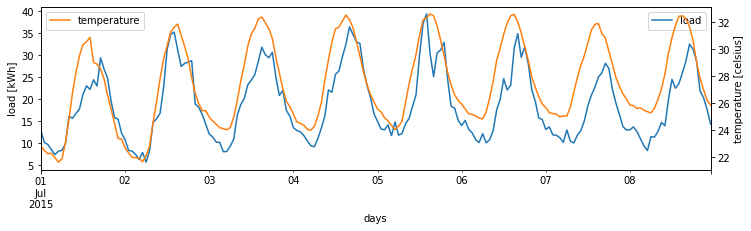

In [ ]:
ax = data["2015-07-01":"2015-07-08"].load.plot(figsize=(12,3),label='load')
ax2 = ax.twinx()
data["2015-07-01":"2015-07-08"].temperature.plot(ax=ax2, color="C1",label='temperature')
handles, labels = ax.get_legend_handles_labels()
plt.legend()
ax.legend(handles=handles, labels=labels)
ax2.set_ylabel('temperature [celsius]')
ax.set_ylabel('load [kWh]')
ax.set_xlabel('days')


We can see that the profile is considerably influenced by the AC load, hence by the outside temperature. Thus the outside temperature should be a good predictor but we still need to learn a model that we can translate the patterns and reduce the spread we see on this image, compared for example to just applying a constant multiplication factor. 

 👉 ***Relevance to the datathon:*** *Analyze and visualize the data, the different predictive features and their correlations to form some hypotheses that you can test with different model set-ups.*

## Energy Forecasting as Machine Learning Problem

Supervised machine learning algorithms can learn the relationship (a function **f**) between a set of input variables referred to as features that are typically measured or preset and have some influence on one or several output variables. These features are often denoted as a matrix $\mathbf{X}$. When the task is to predict a numeric variable, i.e., for regression problems, the output is referred to as target and often denoted as a matrix $\mathbf{y}$.

But how can the time series forecasting problem as in the following figure be formulated as a machine learning problem so that it can be solved by general machine learning models?

The remainder of this tutorial adresses this by discussing how to generate feature candidates from time series and discusses some time series specific model diagnostics. 

| 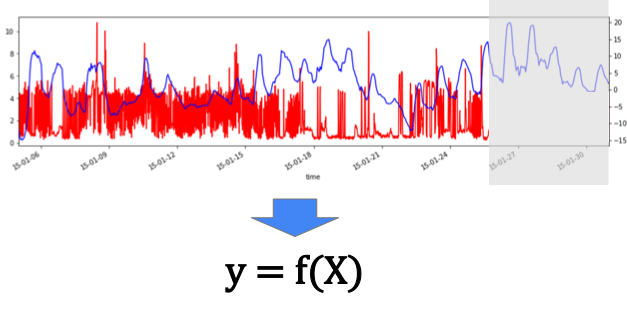 | 
|:--:| 
| *Source: Own figure* |


 👉 ***Relevance to the datathon:*** *Could time series analysis be applied in the WiDS datathon? Maybe* 🙃 *There are usually data points for several years for many buildings in dataset. You don't have building IDs but if you can find ways to cluster buildings, you could build time series for clusters and then try to take advantage of the temporal structure of the data.*


### Generating some feature candidates

Let's now extract information from our initial data using domain knowledge to generate a set of predictive features. There are many different things one can do. For energy forecasting some ideas are the following:
* Add „lagged“, i.e. prior, values of your target **y** (or other variables) to model autoregressive effects, 
* Add calendar-based features (e.g. the day of the week, month of the year, if it is a holiday yes/no, the hour of day) to model seasonal effects, 
* Add numerical weather predictions (NWP) or climate data to model external effects

While these by itself can inform machine learning models, it may be usefuly to engineer them to more ellaborate features
* Interactions of two or more variables,
* Moving averages of variables,
* Polynoms of variables to model non-lineare effects (especially for simpler models like linear regression),
* Ratios of variables,
* …

The following figure schematically shows how the feature matrix $X$ and the target vector $y$ could look like for the load forecasting problem:

| 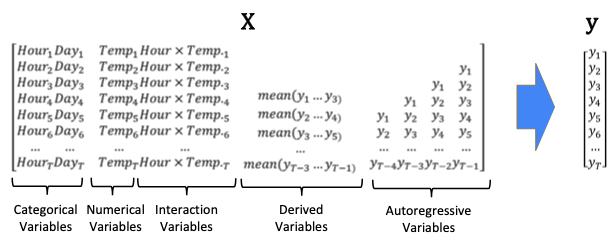 | 
|:--:| 
| *Source: Own figure.* |

(Note that creating lags leads to NaN values that need to be cut off before training models.)   

When encoding calendar-based variables, there are different ways to approach this:
* Encode them as numbers (e.g., Januar, Februar, … = 1, 2, ….). **Problem**: Numbers indicate „closeness“, „order“ and linear increasing relationship that may not be useful for all models.
* Dummy-encode/One-Hot-Encode (e.g. Monday, Tuesday, … = (1,0,0,0,0,0,0), (0,1,0,0,0,0,0), …) the variables. This is the most common approach. **Problem**: Hoever, now no information about order is preserved. For instance, January and February are somewhat similar. Also, cyclic properties are not preserved, e.g. December and January may also be considered simimalar.
* Model seasonal properties using Sine and Consin functions!

As described in [this post,](https://towardsdatascience.com/forecasting-energy-consumption-using-neural-networks-xgboost-2032b6e6f7e2) one can encode the seasonal properties using Sine and Cosine functions as visualised in the following figure from the post:



| <img src="https://miro.medium.com/max/1400/1*GuL5Cq_yBBKY6aqUD0jtDQ.png" alt="Encoding" style="float: left; margin-right: 10px;" />| 
|:--:| 
| *Source: [Blog Post on Towards Datascience.](https://towardsdatascience.com/forecasting-energy-consumption-using-neural-networks-xgboost-2032b6e6f7e2)* |

The following cell generates exemplarily some feature candidates. 

In [ ]:
# add sine/cosine encoding for hour of day and month of the year
data["hour_x"] = np.sin((360/24) * data.index.hour)
data["hour_y"] = np.cos((360/24) * data.index.hour)
data["month_x"] = np.sin((360/12) * data.index.month)
data["month_y"] = np.cos((360/12) * data.index.month)

# temperature related variables, the mean of last day and lagged by one value, which may better capture the "recency effect"
data["temperature_rolling_mean"] = data.loc[:,"temperature"].rolling(window=24).mean()
data["temperature_lag_1"] = data.temperature.shift(1)

# Add lags up to one day
MAX_LAG = 24
for lag in range(1, MAX_LAG+1):
    data["load_lag_" + str(lag)] = data["load"].shift(lag)

# add calendar-based variables as categorical data
data["day_of_week"] = data.index.weekday
data["hour_of_day"] = data.index.hour
data["month_of_year"] = data.index.month
data["weekend"] = data.index.weekday.isin([5,6])
data = pd.get_dummies(data, columns=["day_of_week", "hour_of_day", "month_of_year"])
data.head()

,load,temperature,hour_x,hour_y,month_x,month_y,temperature_rolling_mean,temperature_lag_1,load_lag_1,load_lag_2,load_lag_3,load_lag_4,load_lag_5,load_lag_6,load_lag_7,load_lag_8,load_lag_9,load_lag_10,load_lag_11,load_lag_12,load_lag_13,load_lag_14,load_lag_15,load_lag_16,load_lag_17,load_lag_18,load_lag_19,load_lag_20,load_lag_21,load_lag_22,load_lag_23,load_lag_24,weekend,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,hour_of_day_0,hour_of_day_1,hour_of_day_2,hour_of_day_3,hour_of_day_4,hour_of_day_5,hour_of_day_6,hour_of_day_7,hour_of_day_8,hour_of_day_9,hour_of_day_10,hour_of_day_11,hour_of_day_12,hour_of_day_13,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23,month_of_year_1,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,month_of_year_12
2015-01-01 00:00:00-06:00,6.378,3.22,0.000000,1.000000,-0.988032,0.154251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 01:00:00-06:00,6.134,3.33,0.650288,-0.759688,-0.988032,0.154251,NaN,3.22,6.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 02:00:00-06:00,6.420,3.14,-0.988032,0.154251,-0.988032,0.154251,NaN,3.33,6.134,6.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 03:00:00-06:00,6.129,2.69,0.850904,0.525322,-0.988032,0.154251,NaN,3.14,6.420,6.134,6.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2015-01-01 04:00:00-06:00,6.687,2.53,-0.304811,-0.952413,-0.988032,0.154251,NaN,2.69,6.129,6.420,6.134,6.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['load', 'temperature', 'hour_x', 'hour_y', 'month_x', 'month_y',
       'temperature_rolling_mean', 'temperature_lag_1', 'load_lag_1',
       'load_lag_2', 'load_lag_3', 'load_lag_4', 'load_lag_5', 'load_lag_6',
       'load_lag_7', 'load_lag_8', 'load_lag_9', 'load_lag_10', 'load_lag_11',
       'load_lag_12', 'load_lag_13', 'load_lag_14', 'load_lag_15',
       'load_lag_16', 'load_lag_17', 'load_lag_18', 'load_lag_19',
       'load_lag_20', 'load_lag_21', 'load_lag_22', 'load_lag_23',
       'load_lag_24', 'weekend', 'day_of_week_0', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'hour_of_day_0', 'hour_of_day_1', 'hour_of_day_2',
       'hour_of_day_3', 'hour_of_day_4', 'hour_of_day_5', 'hour_of_day_6',
       'hour_of_day_7', 'hour_of_day_8', 'hour_of_day_9', 'hour_of_day_10',
       'hour_of_day_11', 'hour_of_day_12', 'hour_of_day_13', 'hour_of_day_14',
       'hour_of_day_15', 'hour_of_day_16', 'hour_of_da

We have now created 76 features from our 3 initial columns that we are hoping will provide the model with richer predictive information!

 👉 ***Relevance to the datathon:*** *Try various ways to encode the data based on the hypotheses you formed from analyzing the data.*




### Preparing the model inputs and target

The target is prepared for multi-output regression models in shape (n samples, H) with H being the forecast horizon in hours.

In [ ]:
H = 24
Y = pd.DataFrame(index = data.index)
for h in range(H):
    Y["h_" + str(h)] = data.load.shift(-h)

Numeric input should be scaled using for instance standardization or min/max scaling. Categorical data should be one-hot encoded (already done above).

In [ ]:
scaler = StandardScaler()
numeric_cols = ["temperature"] + [c for c in data.columns if "load_lag" in c] 
categorical_cols = [c for c in data.columns if "hour_of_day" in c] + [c for c in data.columns if "day_of_week" in c]
numerics = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), index=data.index, columns=numeric_cols)
categoricals = data[categorical_cols]

X = pd.concat([numerics, categoricals],axis=1)

Note, that generally there are different ways that one can use to preprocess data. Here we use standard scaling, but you may also try Min-/Max-Scaling, Logarithmic Transforms or Box-Cox-Transforms, depending on the models used. 


Available data is split up to train and test data. 

In [ ]:
X, Y = X.iloc[MAX_LAG:-H,:], Y.iloc[MAX_LAG:-H,:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=False)

 👉 ***Relevance to the datathon:*** *Think about how the model can use the information in the encodings you chose. For example, how much variance do the different features have? May this have an impact on the model performance? Is scaling all or certain features a relevant strategy?*

## Experiments: Fitting a ML model to forecast building loads 24 hours ahead

We will now run several experiments by fitting different models and compare their results to get a feeling of which strategy works best.

### Fitting some baseline models

We start by fitting some sklearn machine learning models to the data and compare them in term of MAPE and RMSE scores (kWh). 

Our simplest model is the k nearest neighbors. Note, that for time series models it can make sense to start with even simpler benchmarks. For one-step ahead forecasting this may be the *persistence model*, i.e., predicting the same value as in the previous time step. For seasonal data this may also be the value of the last season, e.g., last monday for a monday or the value from last year. Or moving averages of several values last values (or seasonal values). For some seasonal data such *naive models* can be surprisingly hard to beat. 

In [ ]:
def mape(y_true, y_pred): 
    return mean_absolute_percentage_error(y_true, y_pred)

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# Fit a KNN regression model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

y_hat = pd.DataFrame(model.predict(X_test), index=y_test.index)
print("RMSE: %.2f" % rmse(y_test, y_hat))
print("MAPE: %.2f" % mape(y_test, y_hat))

RMSE: 3.40
MAPE: 0.18


Let's now fit a L2-penalized linear regression model.
 
KNN is already capable of multi-output regression to predict the several time steps ahead. The linear model needs to be wrapped in the MultiOutputRegressor model, which fits one model per output variable.

In [ ]:
model = MultiOutputRegressor(Ridge())
model.fit(X_train, y_train)

y_hat = pd.DataFrame(model.predict(X_test), index=y_test.index)
print("RMSE: %.2f" % rmse(y_test, y_hat))
print("MAPE: %.2f" % mape(y_test, y_hat))

RMSE: 3.29
MAPE: 0.18


Our second model provides an improvement in term of RMSE. 😏 

One can also compare the forecast to the actual visually by plotting one week. We see that the ridge model captures well the patterns but tends to underestimate peak demand.

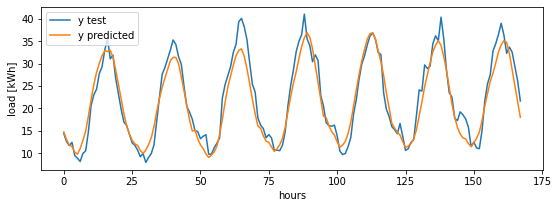

In [ ]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(y_test[y_test.index.hour==0].iloc[:7].values.reshape(-1,1),label='y test')
ax.plot(y_hat[y_hat.index.hour==0].iloc[:7].values.reshape(-1,1),label='y predicted')
ax.set_ylabel('load [kWh]')
ax.set_xlabel('hours')
plt.legend()

 👉 ***Relevance to the datathon:*** *Start with the simplest linear methods. Find a benchmark to compare your results to: how good is a RMSE of 3.40 kWh? For example, you can compare it to the variance of the data or the results of a naive model that would always predict the mean value of its distribution.*

### Cross-validation schema comparison

Next, we compare how different cross-validation schemes can be used to search for hyper-parameters. Tuning the parameters can generate substantial performance gain, but this can also lead to overfitting. Thus, we use a cross-validation scheme to understand the impact of several values for the  hyper-parameters by splitting the training set in several training and validation folds. Here, we are tuning the parameter *k* of *k*-nearest neighbor. 

We try 3 cross-validation approaches:
- *shuffled*, we take random samples for each fold
- *by blocks*, we take folds that are continuous time blocks all with the same duration     
- *by time series split*, we take folds that are continuous time blocks of different durations (for example fold 1 is two months, fold 2 is three months,...)

See below schematics of blocked (left), time series (middle) and shuffled (right) folds:

| 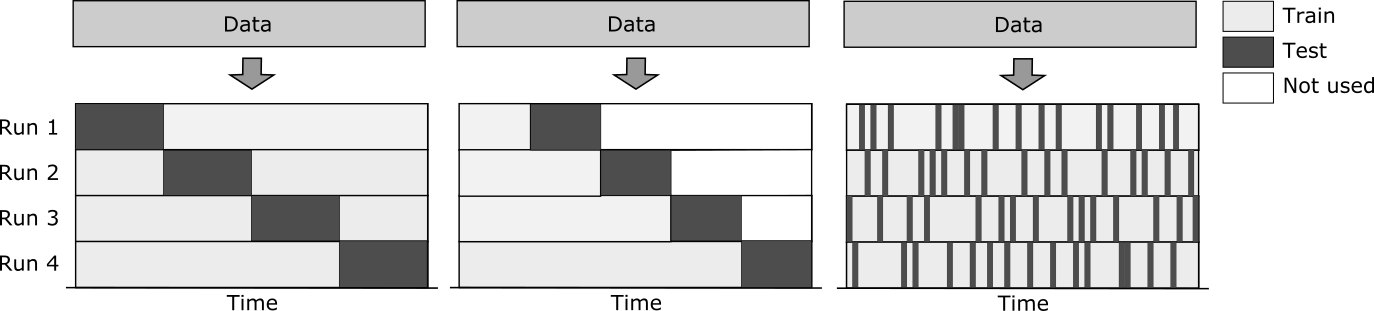 | 
|:--:| 
| *Source: Own figure.* |



In [ ]:
N  = 4
knn = KNeighborsRegressor()
knn_parameters = {"n_neighbors" : [3, 6, 12, 18, 24]}

# Using shuffle=False, the KFold represents "blocked cross-validation", i.e. consequitive blocks remain together
gs_cv_block = GridSearchCV(knn, knn_parameters, scoring="neg_mean_squared_error", cv=KFold(n_splits=N, shuffle=False), n_jobs=-1, return_train_score=True)
gs_cv_block.fit(X_train, y_train)
print(gs_cv_block.best_params_) 
y_hat = gs_cv_block.predict(X_test)
print("Test RMSE Blocked: %.2f" % rmse(y_test, y_hat))

# Using shuffle=True, the KFold represents regular, completely shuffled cross-validation
gs_cv_shuffle = GridSearchCV(knn, knn_parameters, scoring="neg_mean_squared_error", cv=KFold(n_splits=N, shuffle=True), n_jobs=-1, return_train_score=True)
gs_cv_shuffle.fit(X_train, y_train)
print(gs_cv_shuffle.best_params_) 
y_hat = gs_cv_shuffle.predict(X_test)
print("Test RMSE Shuffled: %.2f" % rmse(y_test, y_hat))

# Sklearn also includes a CV scheme for time series
gs_cv_ts = GridSearchCV(knn, knn_parameters, scoring="neg_mean_squared_error", cv=TimeSeriesSplit(n_splits=N), n_jobs=-1, return_train_score=True)
gs_cv_ts.fit(X_train, y_train)
print(gs_cv_ts.best_params_) 
y_hat = gs_cv_ts.predict(X_test)
print("Test RMSE Time Series CV: %.2f" % rmse(y_test, y_hat))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_neighbors': 24}
Test RMSE Blocked: 3.29
{'n_neighbors': 24}
Test RMSE Shuffled: 3.29
{'n_neighbors': 24}
Test RMSE Time Series CV: 3.29


First comparing the result of the test set, they all improve on the baseline model that is not tuned and are having a similar effect.

However, in cross-validation schemes, an important consideration is that the folds should generally be independent and follow the distribution of the actual data. We analyze this by plotting the negative MSE errors of the different folds.

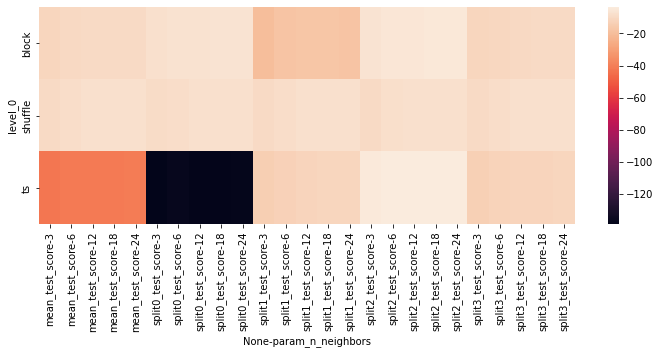

In [ ]:
cv_results = pd.concat([pd.DataFrame(gs_cv_ts.cv_results_), pd.DataFrame(gs_cv_shuffle.cv_results_), pd.DataFrame(gs_cv_block.cv_results_)], keys=["ts", "shuffle", "block"]).reset_index()
fig, ax = plt.subplots(figsize=(12,4))   
sns.heatmap(cv_results.pivot(index="level_0", columns="param_n_neighbors", values=["mean_test_score", "split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score"]), ax=ax)

We see that the errors across folds are similar for shuffled and blocked CV, but for time split some folds have much higher errors.

For the time series scheme, this is due to the fact that the distribution in the folds varies much, hence violating the latter assumption. The shuffled scheme has a more stable distributions across the folds, compared to the other schemes. However, given the lagged, auto-correlation variables, the shuffled scheme violates the independence assumption, as data "leakes" between the folds. This may by alright, if errors are uncorrelated (see [this paper](https://robjhyndman.com/papers/cv-wp.pdf) if you want to deep dive this topic). A blocked scheme with some large N could be a compromise here. 

👉 ***Relevance to the datathon:*** *The cross-validation scheme you choose will be determinant to get good generalization results. An unrealistic cross-validation scheme may produce over-optimistic results on the validation set that will in turn lead to poor results on the unseen test set.*

### Comparing Encodings for categorical variables

As discussed above, calendar-based categorical variables can be encoded using one-hot encoding or using sine/cosine. The latter has the advantage of using fewer variables and incorporating knowledge about the distance of for instance the hours of the day at night (11pm is close to 1 am) or months (January is close to December). 

In [ ]:
scaler = StandardScaler()
numeric_cols = ["temperature","hour_x", "hour_y", "month_x", "month_y"] + [c for c in data.columns if "load_lag" in c] 
numerics = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), index=data.index, columns=numeric_cols)

X_sine = numerics
X_sine = X_sine.iloc[MAX_LAG:-H,:]
X_sine_train, X_sine_test, _, _ = train_test_split(X_sine, Y, test_size=0.25, shuffle=False)

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print("RMSE One-hot encoding: %.2f" % rmse(y_test, y_hat))

knn = KNeighborsRegressor()
knn.fit(X_sine_train, y_train)
y_hat = knn.predict(X_sine_test)
print("RMSE Sine/Cose Encoding: %.2f" % rmse(y_test, y_hat))

RMSE One-hot encoding: 3.40
RMSE Sine/Cose Encoding: 3.43


Here, we find that both models have similar performance.

👉 ***Relevance to the datathon:*** *One way of encoding may work better for the one algorithm and one problem, while the other may work better for some other, try out different things.* 

### Fitting a neural network using Tensorflow

Finally, we use a simple artificial neural network using Tensorflow. There are different ways to use Tensorflow, e.g. using the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional) or the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential). Here, we use the [sklearn integration](https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn/KerasRegressor). 

This allows easy comparison so "simpler" models that use the sklearn interface, like the sklearn models or [XGBoost](https://xgboost.readthedocs.io/en/latest/) or [LightGBM](https://lightgbm.readthedocs.io/en/latest/).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  if __name__ == '__main__':


274/274 [==============================] - 0s 1ms/step
RMSE: 3.72
MAPE: 0.21


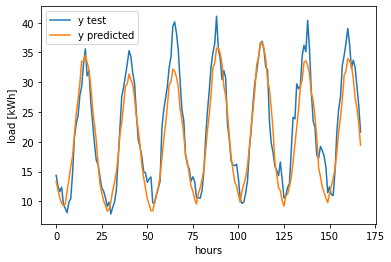

In [ ]:
def create_my_ann(input_dim, output_dim, hidden_neurons):
    model = Sequential()
    model.add(Dense(hidden_neurons, input_dim=input_dim, activation='relu'))
    model.add(Dense(hidden_neurons, input_dim=hidden_neurons, activation='relu'))
    model.add(Dense(output_dim))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = KerasRegressor(build_fn=create_my_ann, input_dim=X_test.shape[1], output_dim=H, hidden_neurons=32, nb_epoch=500, batch_size=16, verbose=True)
model.fit(X_train.values, y_train.values)

y_hat = pd.DataFrame(model.predict(X_test), index=y_test.index)
print("RMSE: %.2f" % rmse(y_test, y_hat))
print("MAPE: %.2f" % mape(y_test, y_hat))

fig, ax = plt.subplots()
ax.plot(y_test[y_test.index.hour==0].iloc[:7].values.reshape(-1,1),label='y test')
ax.plot(y_hat[y_hat.index.hour==0].iloc[:7].values.reshape(-1,1),label='y predicted')
ax.set_ylabel('load [kWh]')
ax.set_xlabel('hours')
plt.legend()

This model turns out to perform worse than our initial baseline. Some additional tuning may improve the results.

👉 ***Relevance to the datathon:*** *For tasks like building load forecast, neural nets can be hard to fit, for example because of overfitting problems. But they may be a relevant candidate if you feel like playing around with them for a bit.* 😀 


### Model diagnostics

A good forecasting method will yield residuals with the following properties:
* *The residuals are uncorrelated.* If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.
* *The residuals have zero mean.* If the residuals have a mean other than zero, then the forecasts are biased.

In addition to these essential properties, it is useful (but not necessary) for the residuals to also have the following two properties:
* The residuals have constant variance.
* The residuals are normally distributed.

The following plots show exemplarily diagnostic plots of a historgram of residuals (top) and the autocorrelation plot of the residuals (bottom).

| | 
|:--:|
| <img src="https://otexts.com/fpp3/fpp_files/figure-html/GSPhist-1.png" alt="histogram" style="float: left; margin-right: 10px;" /> | 
| <img src="https://otexts.com/fpp3/fpp_files/figure-html/GSPacf-1.png"   alt="residuals AR" style="float: left; margin-right: 10px;" /> | 
| *Source: [FPP book](https://otexts.com/fpp3/).* |

 👉 ***Relevance to the datathon:*** *Using model diagnostic techniques that go beyond the error measure that is minimized can help to understand, compare and improve models more effectively!*

### Other practical issues

When working with the data in the challenge (or in fact any data science problem), you may encounter two other practical issues that we don't address in detail here, but you should be aware of: *missing data* and *outliers*.  

Unfortunately for you, there is no definite way to approach either of the two practical problems as they are very dependent on the specific dataset and data science problem. 

For missing data, it can be helpful to simply ignore such instances that are not complete. However, this may result in throwing away data that can be useful in the prediction task. So another way is to fill missing data, e.g. by using interpolation methods (e.g. linear interpolation for short periods) or using actual forecasting methods to fill gaps (see the [KNN imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer) for sklearn).

For outliers there are also different methods to detect outliers as it depends a lot on the specific dataset. For instance a sudden spike in a household load profile can be a measurement error, but can just as well be a large device. Even if outliers are identified, how should one process the data? Treat it as missing data? Should it be filled with new values?

The following figure gives and example of missing data (top) and outliers (bottom). 

| | 
|:--:|
|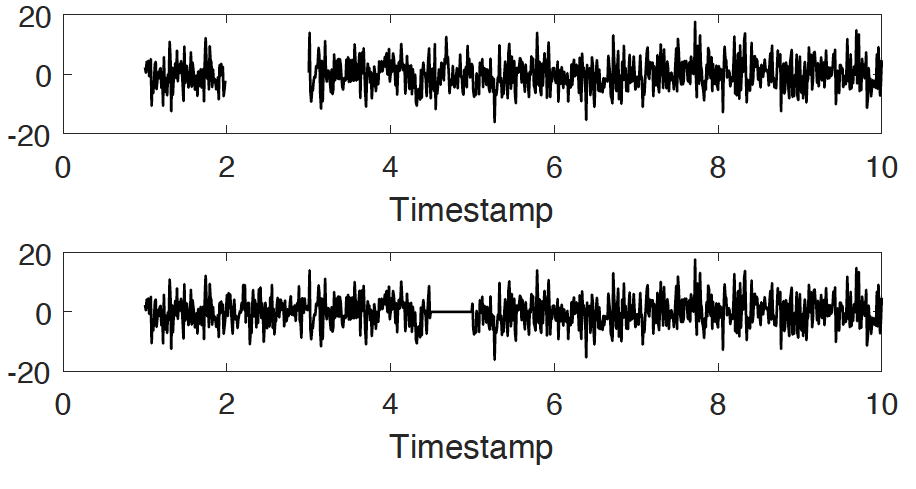 |
|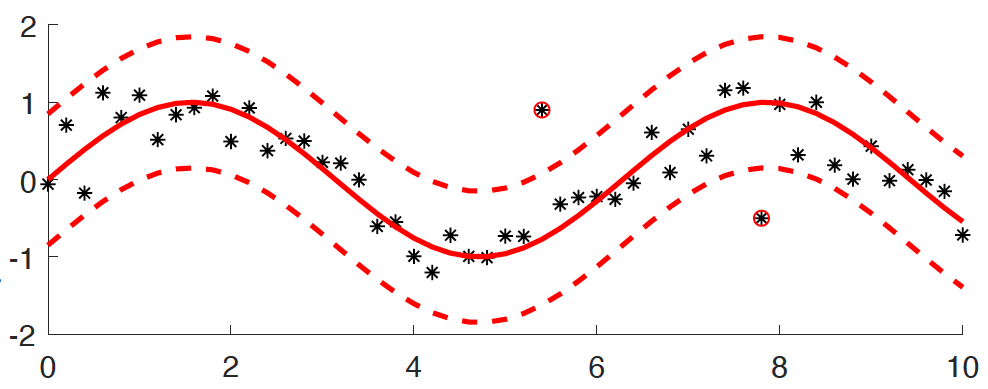|
| *Source: Own figure (by Stephen Haben).* |

 👉 ***Relevance to the datathon:*** *As you are working with real-world data, you will have to watch out for missing and unrealistic values in the data and come up with solution strategies.*


## Conclusions

In summary, in this tutorial we have looked at building load forecasting and discussed methodological commonalities with the building energy prediction task from the [WiDS Datathon 2022](https://www.widsconference.org/datathon.html). 

Here are a few points this tutorial hightlighted that could be helpful to keep in mind when working on the datathon:

1. Don't try to fit a blackbox model but try to understand the problem by visualizing the data and the correlations. Form hypotheses and test them rigorously keeping a common test set to  compare on the same data.

2. Start with simple models, in particular in the context of the tabular data that you are working with for this datathon, and then venture into nonlinear models like boosted trees or neural networks.

3. Aim to incorporate prior/domain knowledge e.g. via encodings.

4. Put efforts in the cross-validation to optimize your model while mitigating the risks of overfitting as much as possible.

5. There is no one best solution to produce a good forecast in general so be creative...

**Good luck!!** 👾
